**Publishers (2)**

1. What factors influence the height of the buyer_bid?
2. Can we (publisher) make more profit by changing the size of the advertisements?
3. What is the most profitable balance between the time visitors spend on our website and the space taken up by advertisements?
4. Which ad has highest profit (media_cost)
5. How much unique viewers in total?
6. What devices are used most? Does this influence the profit?

Factors: creative_size_small/large/medium, buyer_bid, device_type, operating_system, impressions_above_fold

In [67]:
import pandas as pd
import sqlite3
import numpy as np

path = "original dataset/"
data = pd.read_csv(path + "DataChallenge2019_GreenhouseGroup_Bidding_Algorithms_Tests.csv",sep=";")

# db_file = open('db.db','w+')
# conn = sqlite3.connect('db.db',isolation_level = None)
# cur = conn.cursor()

In [1]:
# Question 1

the 0 in small: 180
the 0 in large: 230
MannwhitneyuResult(statistic=59117.0, pvalue=1.0)
RanksumsResult(statistic=-11.811941840095376, pvalue=3.386484424364486e-32)


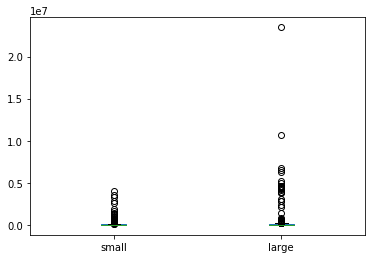

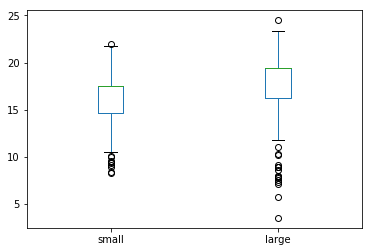

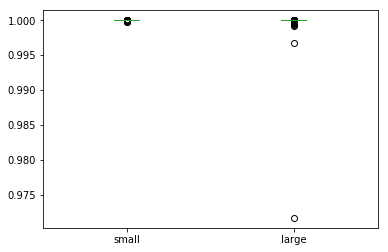

In [244]:
# Question 2
from scipy.stats import ttest_ind,ranksums,mannwhitneyu

# data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# # rearrange data with the proportion of small medium and large of total media cost
# # rearrange[small][1] = small/(small+medium+large) * media_cost
# rearrange = pd.DataFrame(columns=['small','medium','large'])
# rearrange['small'] = data_sml['creative_size_small']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# rearrange['medium'] = data_sml['creative_size_medium']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# rearrange['large'] = data_sml['creative_size_large']*(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
#                     *data_sml['media_cost']
# # value are too small, applying log transformation
# rearrange.plot(kind='box')
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['medium'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)
# rearrange_normal = rearrange.applymap(np.log2)
# rearrange_normal.plot(kind='box')

# removed creative_size_medium since too less data

import math

def sigmoid(x):
    return (1.0+np.tanh(x/2.0))/2.0

data_sml = data[['media_cost','creative_size_small','creative_size_medium','creative_size_large']]
# rearrange data with the proportion of small and large of total media cost
# rearrange[small][1] = small/(small+medium+large) * media_cost
rearrange = pd.DataFrame(columns=['small','large'])
rearrange['small'] = data_sml['creative_size_small']/(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']
rearrange['large'] = (data_sml['creative_size_medium']+data_sml['creative_size_large'])/(data_sml['creative_size_small']+data_sml['creative_size_medium']+data_sml['creative_size_large'])\
                    *data_sml['media_cost']

print('the 0 in small:',len(rearrange[rearrange['small'] == 0]['small']))
print('the 0 in large:',len(rearrange[rearrange['large'] == 0]['large']))


# value are too small, applying log transformation
rearrange.plot(kind='box')

# replace 0 with 1
# rearrange['small'].replace(to_replace=0,value = 1,inplace = True)
# rearrange['large'].replace(to_replace=0,value = 1,inplace = True)

# replace 0 with average
rearrange['small'].replace(to_replace=0,value = rearrange[rearrange['small'] != 0]['small'].mean(),inplace = True)
rearrange['large'].replace(to_replace=0,value = rearrange[rearrange['large'] != 0]['large'].mean(),inplace = True)


rearrange_normal = rearrange.applymap(np.log2)
rearrange_normal.plot(kind='box')


rearrange_sigmoid = rearrange_normal.applymap(lambda x:sigmoid(x))
rearrange_sigmoid.plot(kind='box')
# since dataset are not normal nor have same variance
# H0: small ad and large ad have same income
# H1: small ad has more income than larger ad
# Mann-Whitney U test on small and large

print(stats.mannwhitneyu(rearrange_normal['small'],rearrange_normal['large'],use_continuity=False,alternative='greater'))
print(stats.ranksums(rearrange['small'],rearrange['large']))

# I feels the result doesn't make sense, I feels the dataset is inbalanced, since I replaced all 0 value to average, the 0 can be more in "large" part which will resulting larger ad makes more money

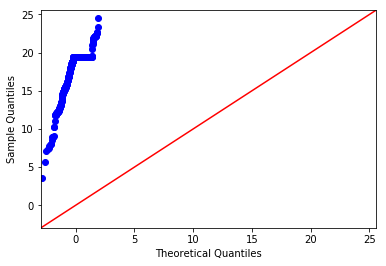

In [217]:
import numpy as np
import statsmodels.api as sm
import pylab

sm.qqplot(rearrange_normal['large'],line='45')
pylab.show()

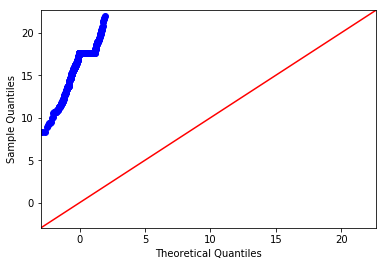

In [218]:
import numpy as np
import statsmodels.api as sm
import pylab

sm.qqplot(rearrange_normal['small'],line='45')
pylab.show()

In [3]:
# Question 3

In [ ]:
# Question 4

In [ ]:
# Question 5

In [ ]:
# Question 6